In [21]:
import pandas as pd
import tensorflow
from tensorflow import keras
import numpy as np
import scipy
import math
import pandas_datareader as web
import matplotlib

In [22]:
amzn_stock = web.DataReader('AMZN',data_source='yahoo', start = "2015-01-01", end = "2020-01-01")
amzn_stock
amzn_stock.shape

(1258, 6)

Text(0, 0.5, 'Price ($)')

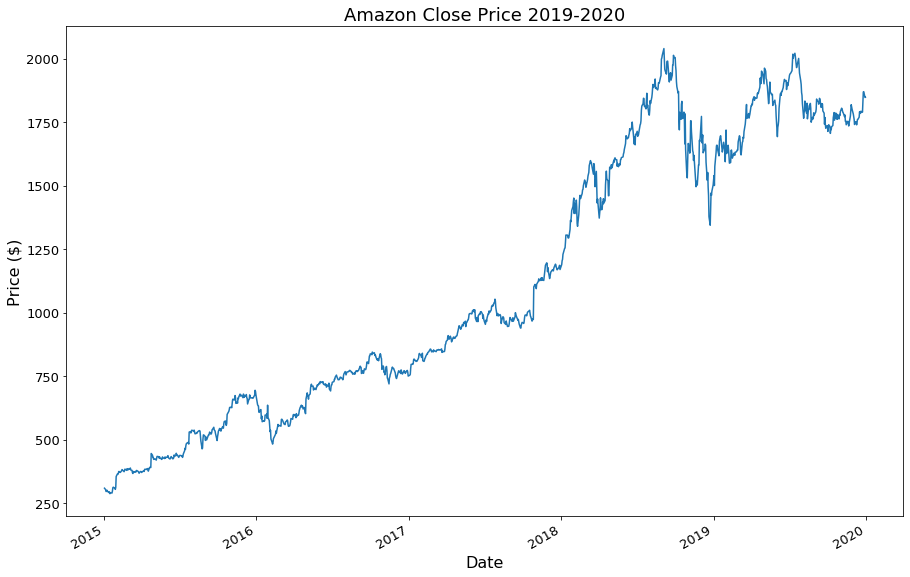

In [23]:

plot = amzn_stock['Close'].plot(legend=None,fontsize=13,figsize=(15,10))
plot.set_title("Amazon Close Price 2019-2020",fontsize=18)
plot.set_xlabel("Date",fontsize=16)
plot.set_ylabel("Price ($)",fontsize=16)


#1539-1847 closing


In [37]:

#main dataset 
df = amzn_stock.filter(['Close'])
main=df.values
#we want to seperate some data for training and some data for testing our accuracy
train_length = math.ceil(0.85 * len(main))
#train_length
print(train_length)
yvals= np.array(main)
#print(max(yvals)) 2020

scaled_main_data = yvals/2020 #to change into percentage 0-1 normalize
#print(yvals)
#print(scaled_main_data) the normalized data
scaled_main_data.shape
scaled_main_data

train_data=scaled_main_data[0:train_length] #215 len


print("len of train data {}".format(len(train_data)))
print(train_data)

print(main)


1070
len of train data 1070
[[0.15273267]
 [0.14959901]
 [0.14618317]
 ...
 [0.89811383]
 [0.89800989]
 [0.90133661]]
[[ 308.51998901]
 [ 302.19000244]
 [ 295.29000854]
 ...
 [1869.80004883]
 [1846.89001465]
 [1847.83996582]]


In [39]:
x_train =[]
y_train=[]

for index in range(100,len(train_data)):
    x_train.append(train_data[index-100:index, 0])
    y_train.append(train_data[index, 0])
    if index <=101:
        print(x_train)
        print(y_train)



[array([0.15273267, 0.14959901, 0.14618317, 0.14773268, 0.14874257,
       0.14699505, 0.14426238, 0.14591089, 0.14518316, 0.14205446,
       0.14393069, 0.14328713, 0.14715347, 0.15362377, 0.15464852,
       0.15329703, 0.15185644, 0.1504505 , 0.15434653, 0.1755099 ,
       0.18043069, 0.17997524, 0.18056931, 0.18509407, 0.18528713,
       0.18344554, 0.18465347, 0.18571288, 0.18671783, 0.18902475,
       0.18585643, 0.18483663, 0.18762376, 0.18993069, 0.18818813,
       0.18742079, 0.19077723, 0.19049504, 0.18819802, 0.19092079,
       0.19040098, 0.18946535, 0.19199504, 0.18816336, 0.18740594,
       0.18292575, 0.18137128, 0.18526732, 0.18345544, 0.18482674,
       0.18411882, 0.18571288, 0.18477227, 0.18737128, 0.18569801,
       0.18519307, 0.18364356, 0.18185644, 0.18344554, 0.18544059,
       0.18420792, 0.18329703, 0.18428218, 0.18665347, 0.18535149,
       0.18871288, 0.18987129, 0.18943069, 0.18928712, 0.19064851,
       0.18982674, 0.19110892, 0.18592079, 0.19282674, 0.1936

In [40]:
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)
print(y_train.shape)
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#y_train=np.reshape(y_train, ()
#print(y_train.shape)
print(x_train.shape)

(970, 100)
(970,)
(970, 100, 1)


In [41]:
#finally the god damn model
#sequential single input single output
model = keras.Sequential([keras.layers.LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)),
                          keras.layers.LSTM(50,return_sequences=False),
                          keras.layers.Dense(25),
                          keras.layers.Dense(10),
                          keras.layers.Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 32,146
Trainable params: 32,146
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam',loss="mean_squared_error")
x_train.shape
y_train.shape

(970,)

In [43]:
model.fit(x_train,y_train,batch_size=1,epochs=1,verbose=1) #more epochs will create overfitting for the data 

Train on 970 samples
970/970 [==============================] - 39s 40ms/sample - loss: 0.0025


In [44]:
test_data = scaled_main_data[train_length - 100: , :] #gets the untouched data to test

print(test_data.shape)

#Create the data sets x_test and y_test
x_test = []
y_test = main[train_length:, :] #gets the training data
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

(288, 1)


In [45]:
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape
y_test.shape

(188, 1)

In [46]:
predictions = model.predict(x_test)

predictions = predictions * 2020
predictions.shape
print(predictions)

[[1680.379 ]
 [1685.9885]
 [1692.0078]
 [1698.5518]
 [1704.356 ]
 [1709.9508]
 [1714.9298]
 [1719.1984]
 [1722.8743]
 [1726.8668]
 [1730.9069]
 [1734.5974]
 [1739.1248]
 [1745.686 ]
 [1752.0391]
 [1757.9486]
 [1765.6138]
 [1773.3009]
 [1779.996 ]
 [1784.9717]
 [1788.0844]
 [1792.8811]
 [1797.8224]
 [1801.1484]
 [1803.154 ]
 [1803.3539]
 [1801.9521]
 [1796.3469]
 [1789.3555]
 [1783.3949]
 [1780.168 ]
 [1776.9136]
 [1773.3722]
 [1769.7864]
 [1766.4751]
 [1761.346 ]
 [1755.7859]
 [1750.9022]
 [1745.8522]
 [1740.8533]
 [1734.1364]
 [1722.6857]
 [1710.8013]
 [1699.7078]
 [1690.5004]
 [1685.428 ]
 [1685.9781]
 [1690.1245]
 [1695.8713]
 [1703.0306]
 [1710.6146]
 [1718.831 ]
 [1727.7113]
 [1736.8531]
 [1746.0958]
 [1754.5352]
 [1762.1324]
 [1767.0316]
 [1770.9666]
 [1774.382 ]
 [1776.7616]
 [1779.7759]
 [1783.5902]
 [1787.9121]
 [1792.498 ]
 [1797.447 ]
 [1804.0879]
 [1812.7894]
 [1821.4602]
 [1830.1157]
 [1838.7439]
 [1846.315 ]
 [1851.9417]
 [1855.3726]
 [1856.6088]
 [1857.4524]
 [1858.418 ]

In [47]:
main=amzn_stock.filter(['Close'])
train = main[:train_length]
test = main[train_length:]
test['Predictions'] = predictions

print(test[['Predictions']])
#this prints the whole data set for amzn stocks



            Predictions
Date                   
2019-04-04  1680.379028
2019-04-05  1685.988525
2019-04-08  1692.007812
2019-04-09  1698.551758
2019-04-10  1704.355957
...                 ...
2019-12-24  1674.274902
2019-12-26  1676.864746
2019-12-27  1683.073120
2019-12-30  1691.183105
2019-12-31  1698.900146

[188 rows x 1 columns]


D:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


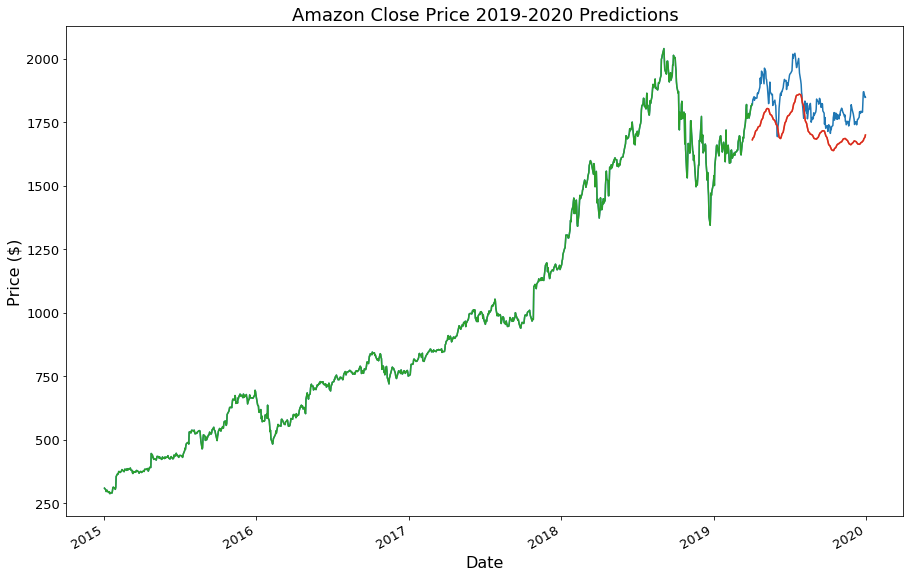

In [48]:
#Visualizing the real results of Amazon's closing price to the prediction
plot2 = amzn_stock['Close'].plot(fontsize=13,figsize=(15,10))
plot2.set_title("Amazon Close Price 2019-2020 Predictions",fontsize=18)
plot2.set_xlabel("Date",fontsize=16)
plot2.set_ylabel("Price ($)",fontsize=16)


test['Predictions'].plot()
plot2.plot(train['Close'])
plot2.plot(test[['Predictions']])

